# Dataset 2: Sales and Inventory Data of Vietnam Retailers
About this dataset
The dataset includes practical information about the sales and inventory data of many retailers in Vietnam in the domain of fashion. The dataset includes sales data (from 2022 - 2023), inventory management data (from 2022 - 2023), and master data, which includes information such as details of prices, products, and distribution channels.
Data explanation
The dataset contains many files and is divided into three areas
## Sales data area
Sales data are collected every month from 2022 - 2023, the files follow the format
TT T<month>-‹year> .xlsx"

Where

<month> represents the month number (from 01 to 12)

<year> represents year number (2022 or 2023).

For example, the file "TT TO1-2022.xls" represents the sales data for January 2022
Each file includes the following data fields:

• month: month in year

• week: week in year

• site: warehouse/store ID

• branch_id: the branch ID

• channel_id: code of distribution channel

• distribution_channel: kind of distribution channel

• distribution_channel_code: Determine the distribution channel's unique code.

• sold_quantity: the number of products or units that have been sold (SỐ LƯỢNG TIÊU THỤ)

• cost _price: the direct costs associated with producing or purchasing the goods that a company sells during a specific accounting period. (TRỊ GIÁ TIÊU THỤ - GIÁ VỐN)

• net _price: the final price of a product (TRỊ GIÁ TIÊU THỊ - GIÁ SAU CHIẾT KHẤU)

• customer_id: the customer ID

• product_id: the product ID
## Inventory data area
Inventory data includes multiple files representing the information on inventory management across plants
(stocks), the data is collected between 2022 and 2023 at the end of every two months. The files follow
the format

"‹date>-<month>-<year>_Ton Kho <start_plant_id> - <end_plant id>.xIsx"

Where
<data>-<month>-<year> represents the date of the inventory data collection
<start_plant_id>-<end_plant_id> represents the range of plant IDs

For instance, the file "31-10-2022_Ton Kho 1161 - 1170xlsx" represents the inventory management data
collected at the end of October in the stocks having IDs from 1161 to 1170
Each file includes the following data fields:

• plant: the id of plant/stock

• calendar_year: year

• calendar_yeer_week: week in year

• sloc: site location

• quantity: represents the overall inventory quantity of products

• total_amount: a total of monetary values

• product_id: represents the product ID
## Master data area
This area includes the following data files

• COGS.xisx: cost price information (Thông tin giá vốn)

• Retail_price.xls: selling price information (Thông tin giá bán)

• Productmaster.xisx: details of product information

• New_Core_Classification.xlsx: illustrates when a product is for sell

• Distribution Channel.xisx: details information of distributors (which are stores or shops that buy products and sell to customers)
The details of the data fields for each file are as follows

COGS.xisx

• amount: monetary values denominated in VND currency units

• valid_from: start date

• product_id: represents the product ID

Retail_price.xlsx

• amount: monetary values denominated in VND currency units

• valid_from: start date

• valid_to: end date

• product_id: represents the product ID

Productmaster.xlsx

• color: Product colors by gender category

• color _group: Similar color groups

• listing_price: detail price of each product

• price_group: Different price groups can influence consumer decisions

• gender: The product users are classified by gender and age

• product_group: Group of products with similar characteristics in terms of design and structure

• detail_product group: Group of product types with similar stylistic features.

• shoe_product: Group of shoe product details with similar characteristics in terms of material

• size_group: Main frame sizes by gender group or special and exceptional frames

• size: Size of each individual product detail

• age_group: Age groups with different preferences and consumer behaviors

• activity_group: A collection of activities with similar usage purposes

• image_copyright: Detailed copyright character name

• lifestyle_group: The fashion styles that consumers aspire to when choosing products

• launch_season: the time period during

• mold_code: Information about the product's heel code

• heel_height: Group of products with a common heel height

• option: A collection of product codes with similar details

• cost_price: includes all the expenses associated with producing or acquiring a product

• product id: represents the product ID

• product_syle_color: represents the style color of a product

• product, syle: represents the style of a product

• brand_name: name of the branch

• vendor_name: name of the vendor

New_Core_Classification.xlsx

• lauch season: launch in this season

• lauch season_num: launch in this season

• sales_season: sale in this season

• sales_season_num: sale in this season

• final_status: status of the product

• b2c_assortment: Deciding to do business

• b2b_assortment: Deciding to do business

• total_assortment: Decision to do business is 1, not to do business is 0 (2 small channels are 0,
then 0 is required, two small channels are 1, then one is required, 1 of the two channels is 1, then 1 is
required)

• product_syle_color: This is the product id" with the last two characters removed, which
represents the product's style and color.

Distribution Channel.xlsx

• b2b_b2c: types of commercial relationships

• channel_id: code of distribution channel

• region: the region

• city_level: the city's level

• store_concept: Detailed business store model

• trade_term: used to define the responsibilities and obligations of buyers and sellers in a sales
contract or international transaction

• area_range: area's range

• store_type: the type of store

• urbanization: the kind of urban

• branch_area: area location of branch

• address_2: district

• address_3: province code

• showroom_area: the area of showroom

• warehouse_area: the area of the warehouse

• start_month: opening month

• start_year: opening year

• end_month: closing month

• end_year: closing year

• note: note for the special cases

• customer_id: the customer ID

• customer_name: the customer's name

# Recommendation Systems with TensorFlow

This Colab notebook complements the course on [Recommendation Systems](https://developers.google.com/machine-learning/recommendation/). Specifically, we'll be using matrix factorization to learn user and products embeddings.



# Introduction


## Outline
  1. Data insights
  1. Preliminaries
  1. Training a matrix factorization model
  1. Inspecting the Embeddings
  1. Regularization in matrix factorization
  1. Softmax model training

## Setup

Let's get started by importing the required packages.

In [ ]:
# @title Imports (run this cell)
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

# Add some convenience functions to Pandas DataFrame.
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

# Install Altair and activate its colab renderer.
print("Installing Altair...")
!pip install git+git://github.com/altair-viz/altair.git
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('colab')
print("Done installing Altair.")

# Install spreadsheets and import authentication module.
USER_RATINGS = False
!pip install --upgrade -q gspread
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

Instructions for updating:
non-resource variables are not supported in the long term


Installing Altair...
  Cloning git://github.com/altair-viz/altair.git to /tmp/pip-req-build-un7lpov2
  Running command git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-un7lpov2
  fatal: unable to connect to github.com:
  github.com[0: 140.82.112.4]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-un7lpov2 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-un7lpov2 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Done installing Altair.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

We then download the MovieLens Data, and create DataFrames containing movies, users, and ratings.

In [ ]:
# Load each data set (users, products, and sales).
user_cols = ['customer_id', 'customer_name', 'b2b_b2c']
users = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/MasterData/Distribution Channel.xlsx', usecols=user_cols)

In [ ]:
product_cols = ['product_id', 'name_description', 'listing_price', 'lifestyle_group']
products = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/MasterData/Productmaster.xlsx', usecols=product_cols)

In [ ]:
sales_cols = ['customer_id', 'product_id', 'sold_quantity']
sales = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/Sales_mentor/TT T06-2023_split_2.xlsx', usecols=sales_cols)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89318 entries, 0 to 89317
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sold_quantity  89318 non-null  int64 
 1   customer_id    89318 non-null  object
 2   product_id     89318 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
sales.head()

,sold_quantity,customer_id,product_id
0,1,2384aef55,46d9bb6fab8a4e9b9c12f36e989c23b2DOD42
1,1,2384aef55,10b099e31d68494badb18a3ece081581KEM39
2,-1,884049e1d,649e1c5a4ed142e9889c9b557dd13550CAM35
3,1,21c6228c8,911e8bb521b645fe898eec1bd51be322XAM36
4,1,838c58db4,a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40


In [ ]:
sales = sales[['customer_id', 'product_id', 'sold_quantity']]
sales.head()

,customer_id,product_id,sold_quantity
0,2384aef55,46d9bb6fab8a4e9b9c12f36e989c23b2DOD42,1
1,2384aef55,10b099e31d68494badb18a3ece081581KEM39,1
2,884049e1d,649e1c5a4ed142e9889c9b557dd13550CAM35,-1
3,21c6228c8,911e8bb521b645fe898eec1bd51be322XAM36,1
4,838c58db4,a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40,1


# I. Exploring the Data

> Indented block


Before we dive into model building, let's inspect our MovieLens dataset. It is usually helpful to understand the statistics of the dataset.

### Users
We start by printing some basic statistics describing the numeric user features.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   b2b_b2c        3405 non-null   object
 1   customer_id    3405 non-null   object
 2   customer_name  3405 non-null   object
dtypes: object(3)
memory usage: 79.9+ KB


In [ ]:
users.describe()

,b2b_b2c,customer_id,customer_name
count,3405,3405,3405
unique,2,3405,2037
top,B2B,435043cf9,customer0
freq,2895,1,201


We can also print some basic statistics describing the categorical user features

In [ ]:
users.describe(include=[np.object])

<ipython-input-9-81b4aa1c5ed8>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  users.describe(include=[np.object])


,b2b_b2c,customer_id,customer_name
count,3405,3405,3405
unique,2,3405,2037
top,B2B,435043cf9,customer0
freq,2895,1,201


We can also create histograms to further understand the distribution of the users. We use Altair to create an interactive chart.

In [ ]:
# @title Altair visualization code (run this cell)
# The following functions are used to generate interactive Altair charts.
# We will display histograms of the data, sliced by a given attribute.

# A function that generates a histogram of filtered data.
def filtered_hist(field, label, filter):
  """Creates a layered chart of histograms.
  The first layer (light gray) contains the histogram of the full data, and the
  second contains the histogram of the filtered data.
  Args:
    field: the field for which to generate the histogram.
    label: String label of the histogram.
    filter: an alt.Selection object to be used to filter the data.
  """
  base = alt.Chart().mark_bar().encode(
      x=alt.X(field, bin=alt.Bin(maxbins=10), title=label),
      y="count()",
  ).properties(
      width=300,
  )
  return alt.layer(
      base.transform_filter(filter),
      base.encode(color=alt.value('lightgray'), opacity=alt.value(.7)),
  ).resolve_scale(y='independent')


Next, we look at the distribution of ratings per user. Clicking on an occupation in the right chart will filter the data by that occupation. The corresponding histogram is shown in blue, and superimposed with the histogram for the whole data (in light gray). You can use SHIFT+click to select multiple subsets.

What do you observe, and how might this affect the recommendations?

In [ ]:
# Create filters to be used to slice the data.
b2b_b2c_filter = alt.selection_multi(fields=["b2b_b2c"])
b2b_b2c_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y("b2b_b2c:N"),
    color=alt.condition(
        b2b_b2c_filter,
        alt.Color("b2b_b2c:N", scale=alt.Scale(scheme='category20')),
        alt.value("lightgray")),
).properties(width=300, height=300, selection=b2b_b2c_filter)


users_sales = (
    sales
    .groupby('customer_id', as_index=False)
    .agg({'sold_quantity': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='customer_id')
)

print(users_sales.columns)

# Create a chart for the count, and one for the mean.
alt.hconcat(
    filtered_hist('sold_quantity count', '# sales / user', b2b_b2c_filter),
    filtered_hist('sold_quantity mean', 'mean user sale', b2b_b2c_filter),
    b2b_b2c_chart,
    data=users_sales)

Index(['customer_id', 'sold_quantity count', 'sold_quantity mean', 'b2b_b2c',
       'customer_name'],
      dtype='object')


alt.HConcatChart(...)

### Movies

It is also useful to look at information about the movies and their ratings.

In [ ]:
# movies_ratings = movies.merge(
#     ratings
#     .groupby('movie_id', as_index=False)
#     .agg({'rating': ['count', 'mean']})
#     .flatten_cols(),
#     on='movie_id')

# genre_filter = alt.selection_multi(fields=['genre'])
# genre_chart = alt.Chart().mark_bar().encode(
#     x="count()",
#     y=alt.Y('genre'),
#     color=alt.condition(
#         genre_filter,
#         alt.Color("genre:N"),
#         alt.value('lightgray'))
# ).properties(height=300, selection=genre_filter)

In [ ]:
products_sales = products.merge(
    sales
    .groupby('product_id', as_index=False)
    .agg({'sold_quantity': ['count', 'mean']})
    .flatten_cols(),
    on='product_id')

style_filter = alt.selection_multi(fields=['genre'])
style_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y('lifestyle_group'),
    color=alt.condition(
        style_filter,
        alt.Color("lifestyle_group:N"),
        alt.value('lightgray'))
).properties(height=300, selection=style_filter)

In [ ]:
(products_sales[['product_id', 'sold_quantity count', 'sold_quantity mean']]
 .sort_values('sold_quantity count', ascending=False)
 .head(10))

,product_id,sold_quantity count,sold_quantity mean
11887,26a3574e5e244ae0a948296c80232780XNH25,313,1.476
11886,d3fdadf707de46058009b94b2e4a86fdTRG25,224,1.393
11835,841b43d2d4d3472aa5e4763af2b9871eTRG25,203,1.251
11834,260ea12c2d284536b01f71b51b62b58fTRG25,187,1.433
11885,c0ad24e036be4f268fd5fe889834c0afXNH23,180,1.389
11833,0a0407df1f6a4dfea01018d1802a6a8bTRG25,165,1.352
11832,224646772819482082b60b93770a92f1HOG23,164,1.189
3415,40e753827624426e9924952571f6abb3XNH41,158,1.759
3403,a9088af9e09d493d87520394469dfa63XAM40,150,1.447
4595,f1cc5e4f7160454aa718723c227d2495XAM25,148,1.236


In [ ]:
(products_sales[['product_id', 'sold_quantity count', 'sold_quantity mean']]
 .mask('sold_quantity count', lambda x: x > 20)
 .sort_values('sold_quantity mean', ascending=False)
 .head(10))

,product_id,sold_quantity count,sold_quantity mean
5139,000108ac94864037b89c6d7ce78d1134KEM35,31,2.710
3389,1d44608ac67945c1a92447e24dd7101aDEN42,71,2.634
3394,d0b571578bc042cca688ec92debbedc4NAU41,83,2.614
3395,d86bc2002a4e458db33b6ceecde3ccb1NAU42,106,2.387
8379,5785af5fb96a46fc9730cd109ef14c61TIM33,43,2.349
8307,abe539cb84bd4da3884b0bcd98101172XAM32,26,2.308
8319,41be63891eb749c7970b6e42285decc8XDG34,21,2.286
5143,5e7f23bd00f342cdad9c3371d1faf2f7KEM39,36,2.278
3388,c116b86ccda5469e8f5657c53bcc61baDEN41,89,2.270
3386,521844b57252468082e29f9b3283d215DEN39,65,2.215


Finally, the last chart shows the distribution of the number of ratings and average rating.

In [ ]:
# Display the number of ratings and average rating per movie.
alt.hconcat(
    filtered_hist('sold_quantity count', '# sales / product', style_filter),
    filtered_hist('sold_quantity mean', 'mean product sold_quantity', style_filter),
    style_chart,
    data=products_sales)

Output hidden; open in https://colab.research.google.com to view.

# II. Preliminaries

Our goal is to factorize the ratings matrix $A$ into the product of a user embedding matrix $U$ and movie embedding matrix $V$, such that $A \approx UV^\top$ with
$U = \begin{bmatrix} u_{1} \\ \hline \vdots \\ \hline u_{N} \end{bmatrix}$ and
$V = \begin{bmatrix} v_{1} \\ \hline \vdots \\ \hline v_{M} \end{bmatrix}$.

Here
- $N$ is the number of users,
- $M$ is the number of movies,
- $A_{ij}$ is the rating of the $j$th movies by the $i$th user,
- each row $U_i$ is a $d$-dimensional vector (embedding) representing user $i$,
- each row $V_j$ is a $d$-dimensional vector (embedding) representing movie $j$,
- the prediction of the model for the $(i, j)$ pair is the dot product $\langle U_i, V_j \rangle$.



## Sparse Representation of the Rating Matrix

The rating matrix could be very large and, in general, most of the entries are unobserved, since a given user will only rate a small subset of movies. For effcient representation, we will use a [tf.SparseTensor](https://www.tensorflow.org/api_docs/python/tf/SparseTensor). A `SparseTensor` uses three tensors to represent the matrix: `tf.SparseTensor(indices, values, dense_shape)` represents a tensor, where a value $A_{ij} = a$ is encoded by setting `indices[k] = [i, j]` and `values[k] = a`. The last tensor `dense_shape` is used to specify the shape of the full underlying matrix.

#### Toy example
Assume we have $2$ users and $4$ movies. Our toy ratings dataframe has three ratings,

user\_id | movie\_id | rating
--:|--:|--:
0 | 0 | 5.0
0 | 1 | 3.0
1 | 3 | 1.0

The corresponding rating matrix is

$$
A =
\begin{bmatrix}
5.0 & 3.0 & 0 & 0 \\
0   &   0 & 0 & 1.0
\end{bmatrix}
$$

And the SparseTensor representation is,
```python
SparseTensor(
  indices=[[0, 0], [0, 1], [1,3]],
  values=[5.0, 3.0, 1.0],
  dense_shape=[2, 4])
```



### Exercise 1: Build a tf.SparseTensor representation of the Rating Matrix.

In this exercise, we'll write a function that maps from our `ratings` DataFrame to a `tf.SparseTensor`.

Hint: you can select the values of a given column of a Dataframe `df` using `df['column_name'].values`.

In [ ]:
# def build_rating_sparse_tensor(ratings_df):
#   """
#   Args:
#     ratings_df: a pd.DataFrame with `user_id`, `movie_id` and `rating` columns.
#   Returns:
#     A tf.SparseTensor representing the ratings matrix.
#   """
#   # ========================= Complete this section ============================
#   # indices =
#   # values =
#   # ============================================================================

#   return tf.SparseTensor(
#       indices=indices,
#       values=values,
#       dense_shape=[users.shape[0], movies.shape[0]])

In [ ]:
#@title Solution
def build_rating_sparse_tensor(sales_df):
  """
  Args:
    sales_df: a pd.DataFrame with `customer_id`, `product_id` and `sold_quantity` columns.
  Returns:
    a tf.SparseTensor representing the ratings matrix.
  """
  indices = sales_df[['customer_id', 'product_id']].values
  values = sales_df['sold_quantity'].values
  return tf.SparseTensor(
      indices=indices,
      values=values,
      dense_shape=[users.shape[0], products.shape[0]])
      # dense_shape=[len(sales.customer_id.unique()), len(sales.product_id.unique())])


## Calculating the error

The model approximates the ratings matrix $A$ by a low-rank product $UV^\top$. We need a way to measure the approximation error. We'll start by using the Mean Squared Error of observed entries only (we will revisit this later). It is defined as

$$
\begin{align*}
\text{MSE}(A, UV^\top)
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( A_{ij} - (UV^\top)_{ij})^2} \\
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( A_{ij} - \langle U_i, V_j\rangle)^2}
\end{align*}
$$
where $\Omega$ is the set of observed ratings, and $|\Omega|$ is the cardinality of $\Omega$.



### Exercise 2: Mean Squared Error

Write a TensorFlow function that takes a sparse rating matrix $A$ and the two embedding matrices $U, V$ and returns the mean squared error $\text{MSE}(A, UV^\top)$.

Hints:
  * in this section, we only consider observed entries when calculating the loss.
  * a `SparseTensor` `sp_x` is a tuple of three Tensors: `sp_x.indices`, `sp_x.values` and `sp_x.dense_shape`.
  * you may find [`tf.gather_nd`](https://www.tensorflow.org/api_docs/python/tf/gather_nd) and  [`tf.losses.mean_squared_error`](https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error) helpful.

In [ ]:
# def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
#   """
#   Args:
#     sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
#     user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
#       dimension, such that U_i is the embedding of user i.
#     movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
#       dimension, such that V_j is the embedding of movie j.
#   Returns:
#     A scalar Tensor representing the MSE between the true ratings and the
#       model's predictions.
#   """
#   # ========================= Complete this section ============================
#   # loss =
#   # ============================================================================
#   return loss

In [ ]:
#@title Solution
def sparse_mean_square_error(sparse_sales, user_embeddings, product_embeddings):
  """
  Args:
    sparse_sales: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    product_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.gather_nd(
      tf.matmul(user_embeddings, product_embeddings, transpose_b=True),
      sparse_sales.indices)
  loss = tf.losses.mean_squared_error(sparse_sales.values, predictions)
  return loss

Note: One approach is to compute the full prediction matrix $UV^\top$, then gather the entries corresponding to the observed pairs. The memory cost of this approach is $O(NM)$. For the MovieLens dataset, this is fine, as the dense $N \times M$ matrix is small enough to fit in memory ($N = 943$, $M = 1682$).

Another approach (given in the alternate solution below) is to only gather the embeddings of the observed pairs, then compute their dot products. The memory cost is $O(|\Omega| d)$ where $d$ is the embedding dimension. In our case, $|\Omega| = 10^5$, and the embedding dimension is on the order of $10$, so the memory cost of both methods is comparable. But when the number of users or movies is much larger, the first approach becomes infeasible.

In [ ]:
#@title Alternate Solution
def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.reduce_sum(
      tf.gather(user_embeddings, sparse_ratings.indices[:, 0]) *
      tf.gather(movie_embeddings, sparse_ratings.indices[:, 1]),
      axis=1)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

### Exercise 3 (Optional): adding your own ratings to the data set

You have the option to add your own ratings to the data set. If you choose to do so, you will be able to see recommendations for yourself.

Start by checking the box below. Running the next cell will authenticate you to your google Drive account, and create a spreadsheet, that contains all movie titles in column 'A'. Follow the link to the spreadsheet and take 3 minutes to rate some of the movies. Your ratings should be entered in column 'B'.

In [ ]:
USER_SALES = True #@param {type:"boolean"}

In [ ]:
# # @title Run to create a spreadsheet, then use it to enter your ratings.
# # Authenticate user.
# if USER_RATINGS:
#   auth.authenticate_user()
#   gc = gspread.authorize(GoogleCredentials.get_application_default())
#   # Create the spreadsheet and print a link to it.
#   try:
#     sh = gc.open('MovieLens-test')
#   except(gspread.SpreadsheetNotFound):
#     sh = gc.create('MovieLens-test')

#   worksheet = sh.sheet1
#   titles = movies['title'].values
#   cell_list = worksheet.range(1, 1, len(titles), 1)
#   for cell, title in zip(cell_list, titles):
#     cell.value = title
#   worksheet.update_cells(cell_list)
#   print("Link to the spreadsheet: "
#         "https://docs.google.com/spreadsheets/d/{}/edit".format(sh.id))

Run the next  cell to load your ratings and add them to the main `ratings` DataFrame.

In [ ]:
# # @title Run to load your ratings.
# # Load the ratings from the spreadsheet and create a DataFrame.
# if USER_RATINGS:
#   my_ratings = pd.DataFrame.from_records(worksheet.get_all_values()).reset_index()
#   my_ratings = my_ratings[my_ratings[1] != '']
#   my_ratings = pd.DataFrame({
#       'user_id': "943",
#       'movie_id': list(map(str, my_ratings['index'])),
#       'rating': list(map(float, my_ratings[1])),
#   })
#   # Remove previous ratings.
#   ratings = ratings[ratings.user_id != "943"]
#   # Add new ratings.
#   ratings = ratings.append(my_ratings, ignore_index=True)
#   # Add new user to the users DataFrame.
#   if users.shape[0] == 943:
#     users = users.append(users.iloc[942], ignore_index=True)
#     users["user_id"][943] = "943"
#   print("Added your %d ratings; you have great taste!" % len(my_ratings))
#   ratings[ratings.user_id=="943"].merge(movies[['movie_id', 'title']])

# III. Training a Matrix Factorization model

## CFModel (Collaborative Filtering Model) helper class
This is a simple class to train a matrix factorization model using stochastic gradient descent.

The class constructor takes
- the user embeddings U (a `tf.Variable`).
- the movie embeddings V, (a `tf.Variable`).
- a loss to optimize (a `tf.Tensor`).
- an optional list of metrics dictionaries, each mapping a string (the name of the metric) to a tensor. These are evaluated and plotted during training (e.g. training error and test error).

After training, one can access the trained embeddings using the `model.embeddings` dictionary.

Example usage:
```
U_var = ...
V_var = ...
loss = ...
model = CFModel(U_var, V_var, loss)
model.train(iterations=100, learning_rate=1.0)
user_embeddings = model.embeddings['user_id']
movie_embeddings = model.embeddings['movie_id']
```


In [ ]:
# @title CFModel helper class (run this cell)
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

### Exercise 4: Build a Matrix Factorization model and train it

Using your `sparse_mean_square_error` function, write a function that builds a `CFModel` by creating the embedding variables and the train and test losses.

In [ ]:
# def build_model(ratings, embedding_dim=3, init_stddev=1.):
#   """
#   Args:
#     ratings: a DataFrame of the ratings
#     embedding_dim: the dimension of the embedding vectors.
#     init_stddev: float, the standard deviation of the random initial embeddings.
#   Returns:
#     model: a CFModel.
#   """
#   # Split the ratings DataFrame into train and test.
#   train_ratings, test_ratings = split_dataframe(ratings)
#   # SparseTensor representation of the train and test datasets.
#   # ========================= Complete this section ============================
#   # A_train =
#   # A_test =
#   # ============================================================================
#   # Initialize the embeddings using a normal distribution.
#   U = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
#   V = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
#   # ========================= Complete this section ============================
#   # train_loss =
#   # test_loss =
#   # ============================================================================
#   metrics = {
#       'train_error': train_loss,
#       'test_error': test_loss
#   }
#   embeddings = {
#       "user_id": U,
#       "movie_id": V
#   }
#   return CFModel(embeddings, train_loss, [metrics])

In [ ]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

In [ ]:
#@title Solution
def build_model(sales, embedding_dim=3, init_stddev=1.):
  """
  Args:
    sales: a DataFrame of the sales
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the sales DataFrame into train and test.
  train_sales, test_sales = split_dataframe(sales)
  print('ok slipt')
  print(train_sales)

  # SparseTensor representation of the train and test datasets.
  A_train = build_rating_sparse_tensor(train_sales)
  print('ok train split')
  A_test = build_rating_sparse_tensor(test_sales)

  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
  train_loss = sparse_mean_square_error(A_train, U, V)
  test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "customer_id": U,
      "product_id": V
  }
  return CFModel(embeddings, train_loss, [metrics])

Great, now it's time to train the model!

Go ahead and run the next cell, trying different parameters (embedding dimension, learning rate, iterations). The training and test errors are plotted at the end of training. You can inspect these values to validate the hyper-parameters.

Note: by calling `model.train` again, the model will continue training starting from the current values of the embeddings.

In [ ]:
def build_rating_sparse_tensor(sales_df):
    """
    Args:
        sales_df: a pd.DataFrame with `customer_id`, `product_id`, and `sold_quantity` columns.
    Returns:
        a tf.SparseTensor representing the ratings matrix.
    """
    # Convert 'sold_quantity' to numeric, coercing errors to NaN
    sales_df['sold_quantity'] = pd.to_numeric(sales_df['sold_quantity'], errors='coerce')

    # Drop rows with NaN in 'sold_quantity' (non-numeric values)
    sales_df = sales_df.dropna(subset=['sold_quantity'])

    # Convert 'sold_quantity' to integers
    sales_df['sold_quantity'] = sales_df['sold_quantity'].astype(int)

    # Create unique integer indices for 'customer_id' and 'product_id'
    customer_ids = pd.factorize(sales_df['customer_id'])[0]
    product_ids = pd.factorize(sales_df['product_id'])[0]

    indices = np.column_stack((customer_ids, product_ids))
    values = sales_df['sold_quantity'].values

    # Use unique counts for dense_shape
    dense_shape = [len(sales_df['customer_id'].unique()), len(sales_df['product_id'].unique())]

    return tf.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)


ok slipt
      customer_id                             product_id  sold_quantity
0       2384aef55  46d9bb6fab8a4e9b9c12f36e989c23b2DOD42              1
1       2384aef55  10b099e31d68494badb18a3ece081581KEM39              1
2       884049e1d  649e1c5a4ed142e9889c9b557dd13550CAM35             -1
3       21c6228c8  911e8bb521b645fe898eec1bd51be322XAM36              1
4       838c58db4  a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40              1
...           ...                                    ...            ...
89312   fc0dc8117  49b5d6025c984b7ab7eb08a7cf449f91DEN42              1
89313   c4b296c29  6cbc7c3d38234ab5949f938898992d1cDOO41              1
89314   8a6174afa  c11d636508c94534b6ddc600e62b7812DOO33              1
89316   047ce954c  479be36e01444741ba49fa778cba1da4NAD39              1
89317   e66bc48d4  8a4019274b484b8ca423aa130f8d8803DEN37              1

[80386 rows x 3 columns]
ok train split


<ipython-input-35-727c15dad4f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['sold_quantity'] = pd.to_numeric(sales_df['sold_quantity'], errors='coerce')


 iteration 1000: train_error=0.958533, test_error=11.647552

[{'train_error': 0.9585325, 'test_error': 11.6475525}]

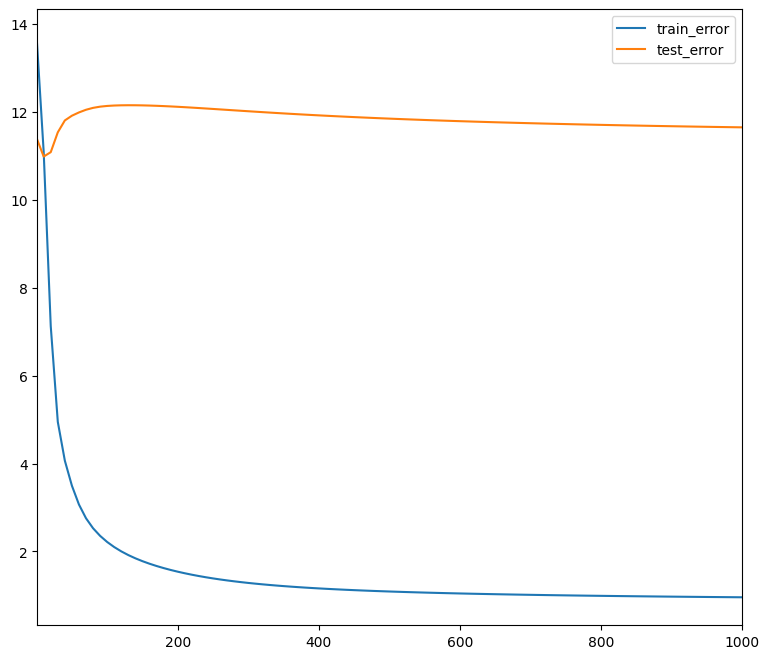

In [ ]:
# Build the CF model and train it.
model = build_model(sales, embedding_dim=30, init_stddev=0.5)
model.train(num_iterations=1000, learning_rate=10.)

The movie and user embeddings are also displayed in the right figure. When the embedding dimension is greater than 3, the embeddings are projected on the first 3 dimensions. The next section will have a more detailed look at the embeddings.